# Observations and Insights 

## **Observation 1**:
Ramicane and Capomulin appear to have been the most effecive overall in reducing tumor size, with Ramicane having the greatest concentration of sujects with ending tumor volumes below 40 mm3 (see table cleanmouse_aggdf and scatter plot 'Average tumor volume vs. mouse weight for the Capomulin regimen' below). Ramicane not only had the lowest final tumor volume it also had a lower average final tumor volume than Capamluin.

## **Observation 2**
Two other drugs compared in the study, Infubinol and Ceftamin, had about 23% less dosage frequency  but resulted in far less favorable ending tumor volumes, with the majority of their sujects having an ending tumor volume over 50 (>75%, ~75% respectivly). 

## **Observation 3**
Based on the correlation coeficient and the regression line on scatter plot:'Average tumor volume vs. mouse weight for Capomulin regimen' we feel confident that the weight of a mouse has a possitive correlation on tumor size.
When ploting subject m601's tumor volume over time we can see an unexpected uptick in tumor volume towards the end of the trial. More investigation should be conducted to ensure that the subjects, data, or trial was not corrupted or influanced in some way. (see chart: 'Mouse: m601 tumor volume vs. time point for Capomulin regimen')

-------------------------------------------------------------------------------

# **Analysis**

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

plt.style.use('seaborn')
# Study data files
mouse_metadata_path = "Resources/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Resources/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results,mouse_metadata).sort_values('Tumor Volume (mm3)')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
514,k403,45,22.050126,1,Ramicane,Male,21,16
1700,s185,45,23.343598,1,Capomulin,Female,3,17
513,k403,40,24.365505,1,Ramicane,Male,21,16
1699,s185,40,25.472143,1,Capomulin,Female,3,17
512,k403,35,26.546993,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

# Clean the Data

* Create a clean DataFrame by dropping the duplicate mouse by its ID.

    * **Optional**: Get all the data for the duplicate mice that shows up for Mouse ID and Timepoint. 

In [3]:
# Optional: Get all the data for the duplicate mouse ID. (was not able to complete)
    #dup_mouseid= mouse_df.groupby(['Mouse ID'])
    # dup_mouseid=mouse_df.duplicated(["Mouse ID"], keep=False)
    # dup_mousedf = mouse_df[dup_mouseid]
    #cleandf = mouse_df.loc[mouse_df[['Mouse ID', 'Timepoint']]==key]
key = mouse_df[['Mouse ID', 'Timepoint']].count()>1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse_df=mouse_df.drop_duplicates(['Mouse ID', 'Timepoint'],keep='first')
cleanmouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
514,k403,45,22.050126,1,Ramicane,Male,21,16
1700,s185,45,23.343598,1,Capomulin,Female,3,17
513,k403,40,24.365505,1,Ramicane,Male,21,16
1699,s185,40,25.472143,1,Capomulin,Female,3,17
512,k403,35,26.546993,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
192,t724,45,75.113288,2,Naftisol,Female,2,25
859,m269,45,75.123690,1,Stelasyn,Female,22,28
50,p189,45,75.294936,4,Ketapril,Male,8,28
155,l725,45,76.668817,3,Naftisol,Female,8,26


In [5]:
# Checking the number of mice in the clean DataFrame.
cleanmouse_df['Mouse ID'].nunique()

249

## Summary Statistics

* Use groupby and summary statistical methods to Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
* Assemble the resulting series into a single summary dataframe.

In [6]:
# summary statistics table
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_mean = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
mouse_med = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
mouse_var = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
mouse_std = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
mouse_sem = pd.DataFrame(cleanmouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())

# Assemble the resulting series into a single summary dataframe.
mouse_groupdf = pd.concat((mouse_mean,mouse_med,mouse_var,mouse_std,mouse_sem),axis=1)
mouse_groupdf = mouse_groupdf.set_axis(['Tumor Vol Mean','Tumor Vol Median','Tumor Vol Varience','Tumor Vol StandDev','Tumor Vol SEM'], axis=1)
mouse_groupdf

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Varience,Tumor Vol StandDev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.369428,50.783528,43.219994,6.574191,0.526357
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


* Using the aggregation method, try to produce the same summary statistics in a single line of code

In [7]:
# Using the aggregation method, try to produce the same summary statistics in a single line of code
cleanmouse_aggdf = cleanmouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
cleanmouse_aggdf

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.369428  50.783528  43.219994  6.574191  0.526357
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

**Compare plot methods**
* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the total number of measurements taken for each treatment regimen throughout the course of the study.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** The `DataFrame.plot()` plots and `pyplot` plots should look identical.

**Rember**: You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

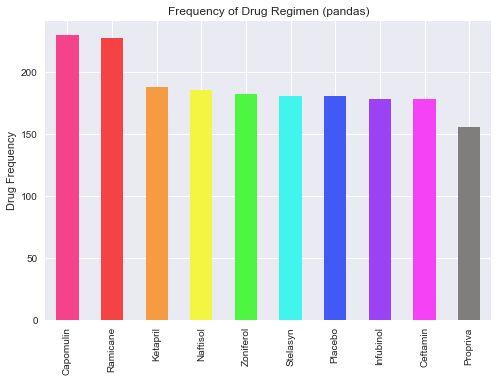

In [8]:
# List of colors for bars
colors= ('#f5428a','#f54242','#f59c42', '#f2f542', '#4ef542','#42f5ec', '#425af5','#9c42f5','#f542f5','#807d7d')
# Isolate the drug freqeuncy then generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugcounts = cleanmouse_df['Drug Regimen'].value_counts().plot(kind='bar', color=colors, title='Frequency of Drug Regimen (pandas)').set_ylabel('Drug Frequency')

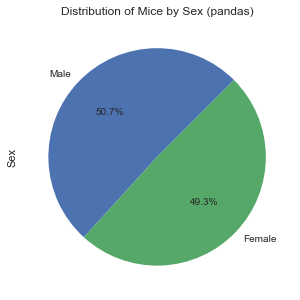

In [9]:
# Isolate the mouse sexes then combine with .plot to create the pie chart
mousesex = cleanmouse_df['Sex'].value_counts().plot(kind='pie', figsize=(5,5),startangle=45, autopct='%1.1f%%', title='Distribution of Mice by Sex (pandas)')

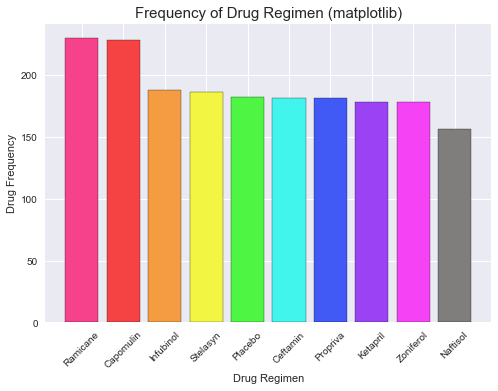

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugcounts = cleanmouse_df['Drug Regimen'].value_counts()
xax = np.arange(len(cleanmouse_df['Drug Regimen'].unique()))
plt.bar(xax,drugcounts,color=colors,edgecolor='#000000',tick_label=cleanmouse_df['Drug Regimen'].unique())
plt.xticks(rotation = 45) 
plt.xlabel('Drug Regimen')
plt.ylabel('Drug Frequency')
plt.title('Frequency of Drug Regimen (matplotlib)', fontdict={'fontsize':15})
plt.show()

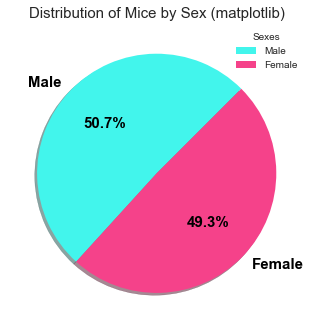

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(cleanmouse_df['Sex'].value_counts(),startangle=45, autopct='%1.1f%%', shadow=True, colors=['#42f5ec','#f5428a'], labels=['Male','Female'],textprops=dict(color='black', size=15, weight='bold') )
plt.title('Distribution of Mice by Sex (matplotlib)', fontdict={'fontsize':15})
plt.legend(title='Sexes')
plt.show() #colors=('#42f5ec','#f5428a') , lebels=('Male','Female')

## Quartiles, Outliers and Boxplots

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: **Capomulin, Ramicane, Infubinol, and Ceftamin**

     * Start by getting the last (greatest) timepoint for each mouse

     * Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# pull out only the 4 drug reg data
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

drugs_df=cleanmouse_df[cleanmouse_df['Drug Regimen'].isin(drugs)]

# Get the last (greatest) timepoint for each mouse
agg_df = drugs_df.groupby(['Drug Regimen', 'Mouse ID']).agg({'Timepoint':['max']})

Timepoint
                            max
Drug Regimen Mouse ID          
Capomulin    b128            45
             b742            45
             f966            20
             g288            45
             g316            45
...                         ...
Ramicane     s508            45
             u196            45
             w678             5
             y449            15
             z578            45

[100 rows x 1 columns]

In [13]:
# CANT FIGURE OUT THE ARGUMENT INSIDE .LOC 
#drugs_df.loc(drugs_df['Drug Regimen']==('Capomulin','Ramicane','Infubinol','Ceftamin'))

In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df= pd.merge(drugs_df,agg_df, on='Mouse ID',suffixes=(False, False))

#rename the tuple column header
merge_df.rename(columns={ ('Timepoint', 'max'):'Timepoint Max'}, inplace=True)

#pull only the max time points from the df for ending tumor vol
merge_df=merge_df.loc[merge_df['Timepoint']==merge_df['Timepoint Max']]
merge_df

C:\Users\Ema\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint Max
0,k403,45,22.050126,1,Ramicane,Male,21,16,45
10,s185,45,23.343598,1,Capomulin,Female,3,17,45
21,x401,45,28.484033,0,Capomulin,Female,16,15,45
30,m601,45,28.430964,1,Capomulin,Male,22,17,45
40,g791,45,29.128472,1,Ramicane,Male,11,16,45
...,...,...,...,...,...,...,...,...,...
784,z581,45,62.754451,3,Infubinol,Female,24,25,45
794,a251,45,65.525743,1,Infubinol,Female,21,25,45
804,y163,45,67.685569,3,Infubinol,Female,17,27,45
806,v339,5,46.250112,0,Infubinol,Male,20,26,5


In [51]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1 = merge_df['Tumor Volume (mm3)'].quantile(.25)
q3 = merge_df['Tumor Volume (mm3)'].quantile(.75)
IQR = q3-q1  
    
#find upper & lower bounds
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)

# Determine outliers using upper and lower bounds
merge_df[(merge_df['Tumor Volume (mm3)']<lower_bound)|(merge_df['Tumor Volume (mm3)']>upper_bound)]
    #no results returned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint Max


* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.
  
  **Rember**: You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

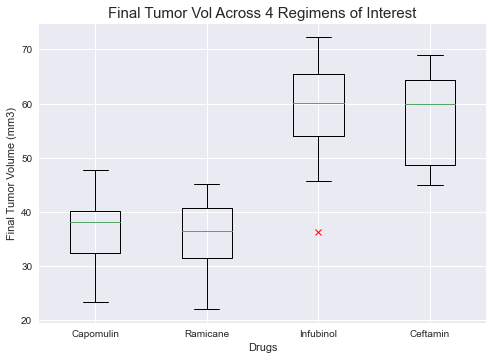

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
CAtumorvol = merge_df.loc[merge_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'] 
RAtumorvol = merge_df.loc[merge_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
INtumorvol = merge_df.loc[merge_df['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
CEtumorvol = merge_df.loc[merge_df['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']

plt.boxplot([CAtumorvol,RAtumorvol,INtumorvol,CEtumorvol], labels=drugs,flierprops={'marker':'x','markeredgecolor':'r'})
plt.title('Final Tumor Vol Across 4 Regimens of Interest', fontdict={'fontsize':15})
plt.xlabel('Drugs')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

* Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

    **Rember**: You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

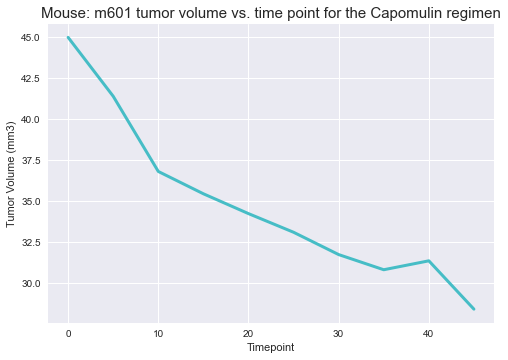

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
CAmouse = cleanmouse_df.loc[cleanmouse_df['Mouse ID']=='m601'].sort_values('Timepoint')
plt.plot(CAmouse['Timepoint'], CAmouse['Tumor Volume (mm3)'],linewidth=3,color='#46bdc6')
#add labeling and titles
plt.title('Mouse: m601 tumor volume vs. time point for Capomulin regimen', fontdict={'fontsize':15})
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

    **Rember**: You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

Slope = 0.954439689024105
Intercept = 21.552160532685004
Rvalue = 0.8419363424694726
PVaule = 1.322572243471202e-07
Standard Deviation = 0.12754359033201304


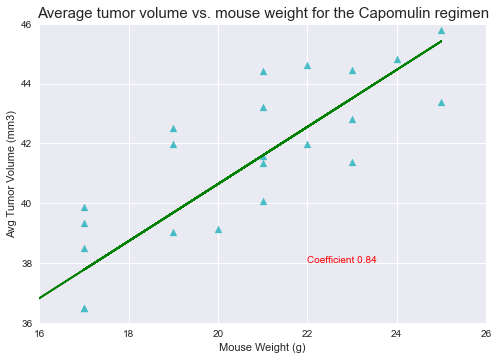

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
CAweight = cleanmouse_df.loc[cleanmouse_df['Drug Regimen']=='Capomulin']
CAavgtumvol = CAweight.groupby('Mouse ID').mean()
plt.scatter(CAavgtumvol['Weight (g)'], CAavgtumvol['Tumor Volume (mm3)'], color='#46bdc6',marker='^')

#Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
corl_coeff = sts.pearsonr(CAavgtumvol['Weight (g)'], CAavgtumvol['Tumor Volume (mm3)'])[0]
(Slope, Intercept, Rvalue, Pval, StandDev) = sts.linregress(CAavgtumvol['Weight (g)'], CAavgtumvol['Tumor Volume (mm3)'])
regress_line =CAavgtumvol['Weight (g)']*Slope+Intercept

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(Slope, Intercept, Rvalue, Pval, StandDev) = sts.linregress(CAavgtumvol['Weight (g)'], CAavgtumvol['Tumor Volume (mm3)'])

#create the regression line from values above
regress_line =CAavgtumvol['Weight (g)']*Slope+Intercept
print(f'Slope = {Slope}\nIntercept = {Intercept}\nRvalue = {Rvalue}\nPVaule = {Pval}\nStandard Deviation = {StandDev}')

#plot the line over the scatter plot
plt.plot(CAavgtumvol['Weight (g)'],regress_line, color='green')
#add labeling and titles
plt.title('Average tumor volume vs. mouse weight for the Capomulin regimen', fontdict={'fontsize':15})
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.xlim(16,26)
plt.ylim(36,46)
plt.annotate('Coefficient '+ str(round(corl_coeff,2)), xy=(22,38), color='red')
plt.show()